# Variance

## Random Variable

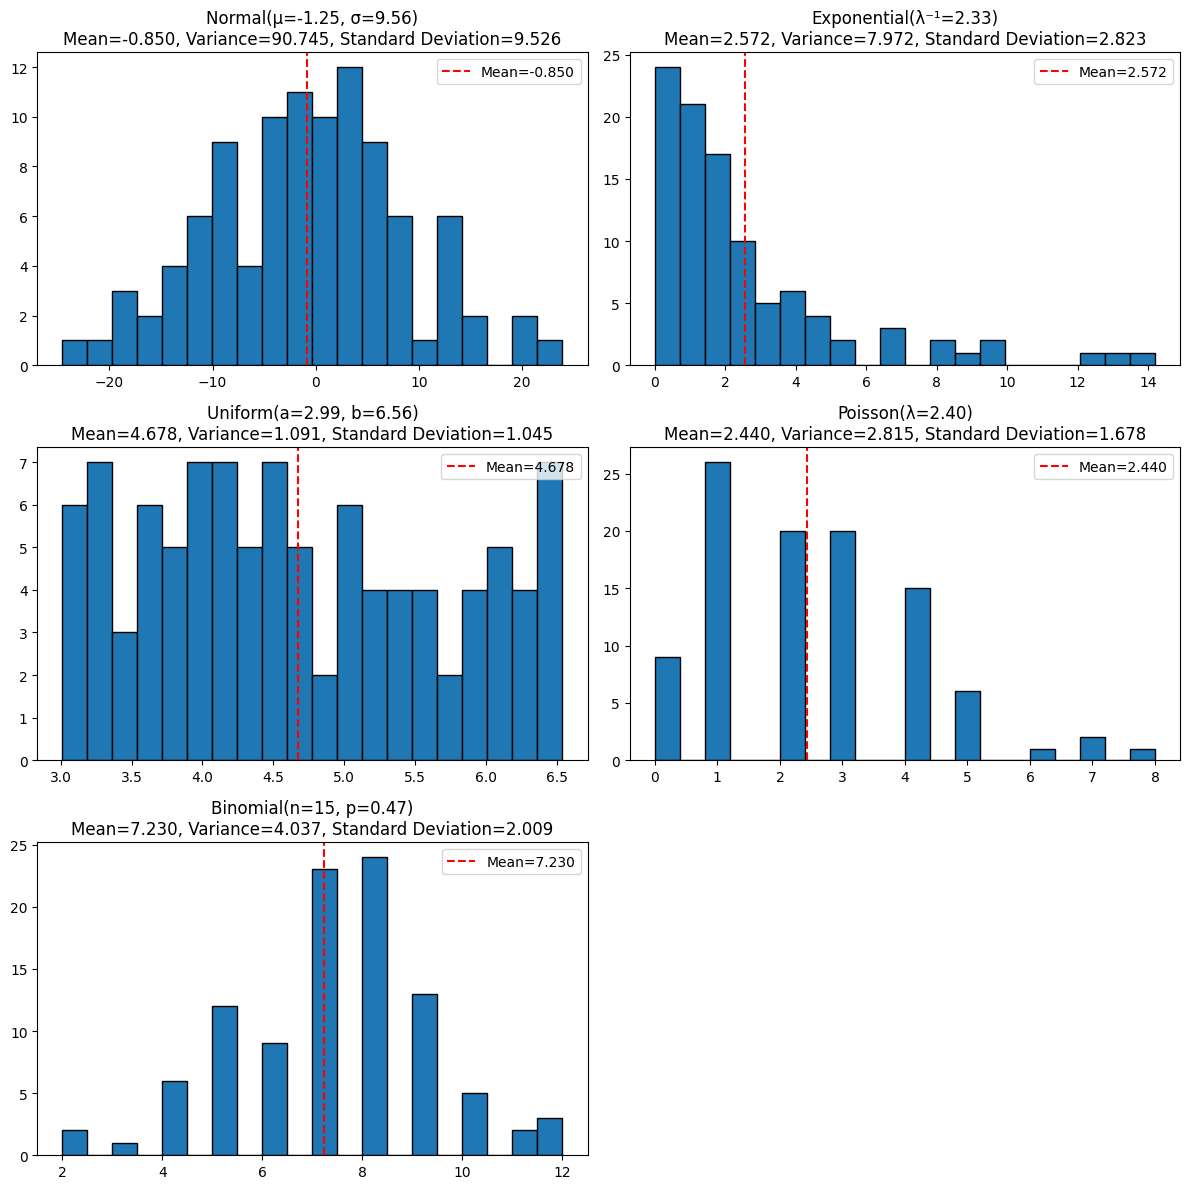

In [24]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n = 100

# Dynamically generate distributions with conventional parameter names for display
distribution_specs = [
    # name, numpy function, numpy args, display param names
    ("Normal", np.random.normal, {"loc": np.random.uniform(-5, 5), "scale": np.random.uniform(1, 10), "size": n},
     {"loc": "μ", "scale": "σ"}),
    
    ("Exponential", np.random.exponential, {"scale": np.random.uniform(0.5, 3), "size": n},
     {"scale": "λ⁻¹"}),
    
    ("Uniform", np.random.uniform, {"low": np.random.uniform(0, 5), "high": np.random.uniform(5, 15), "size": n},
     {"low": "a", "high": "b"}),
    
    ("Poisson", np.random.poisson, {"lam": np.random.uniform(1, 10), "size": n},
     {"lam": "λ"}),
    
    ("Binomial", np.random.binomial, {"n": np.random.randint(5, 20), "p": np.random.uniform(0.1, 0.9), "size": n},
     {"n": "n", "p": "p"})
]

# Generate distributions dynamically
distributions = {}
for name, func, params, display_map in distribution_specs:
    # Build display string with conventional names
    param_str = ", ".join(f"{display_map[k]}={v:.2f}" if isinstance(v, (float, np.floating)) else f"{display_map[k]}={v}" 
                          for k, v in params.items() if k != "size")
    full_name = f"{name}({param_str})"
    distributions[full_name] = func(**params)

# Plot
num_plots = len(distributions)
cols = 2
rows = (num_plots + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
axes = axes.flatten()

for i, (name, values) in enumerate(distributions.items()):
    sample_mean = np.mean(values)
    sample_var = np.var(values, ddof=1)
    sample_std = np.sqrt(sample_var)

    axes[i].hist(values, bins=20, edgecolor="black")
    axes[i].axvline(sample_mean, color='red', linestyle='--', label=f"Mean={sample_mean:.3f}")
    axes[i].set_title(f"{name}\nMean={sample_mean:.3f}, Variance={sample_var:.3f}, Standard Deviation={sample_std:.3f}")
    axes[i].legend()

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()